In [263]:
!pip install -U pandas
!pip install -U matplotlib
!pip install -U seaborn
!pip install -U plotly==5.22.0
!pip install -U nbformat==4.2.0 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np
import plotly.express as px

In [265]:
raw_client_data = pd.read_csv('./logs/c-data.csv')
raw_server_data = pd.read_csv('./logs/s-data.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
raw_client_data.head()

,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients,config_test
0,1,14,poc,random,dnn,0.20,30.174433,0.26,27.335854,0.474453,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
1,1,81,poc,random,dnn,0.32,42.123833,0.31,77.628120,0.758182,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
2,1,0,poc,random,dnn,0.19,14.421803,0.29,117.269112,0.804320,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
3,1,98,poc,random,dnn,0.25,78.871979,0.25,224.975388,0.833333,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
4,1,30,poc,random,dnn,0.25,34.100349,0.21,52.059048,0.512195,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10


In [ ]:
raw_server_data.head()

,rounds,strategy,model_type,select_client_method,select_client_method_to_engaged,n_selected,n_engaged,n_not_engaged,selection,r_intetion,...,dirichlet_alpha,non_iid,dataset,exploitation,exploration,decay,threshold,init_clients,config_test,forget_clients
0,1,poc,dnn,NaN,NaN,100,10,90,0:True|1:False|2:False|3:False|4:False|5:False...,NaN,...,0.1,True,mnist,NaN,0.1,NaN,1.0,0.1,POC 10 ic:10,NaN
1,2,poc,dnn,NaN,NaN,10,10,90,78:False|79:False|61:False|39:False|88:False|5...,NaN,...,0.1,True,mnist,NaN,0.1,NaN,1.0,0.1,POC 10 ic:10,NaN
2,3,poc,dnn,NaN,NaN,10,18,82,79:True|92:True|71:True|74:True|59:True|39:Tru...,NaN,...,0.1,True,mnist,NaN,0.1,NaN,1.0,0.1,POC 10 ic:10,NaN
3,4,poc,dnn,NaN,NaN,10,18,82,58:True|59:True|39:True|79:True|92:True|71:Tru...,NaN,...,0.1,True,mnist,NaN,0.1,NaN,1.0,0.1,POC 10 ic:10,NaN
4,5,poc,dnn,NaN,NaN,10,18,82,79:True|59:True|88:True|74:True|92:True|58:Tru...,NaN,...,0.1,True,mnist,NaN,0.1,NaN,1.0,0.1,POC 10 ic:10,NaN


In [ ]:
all_labels = raw_client_data['config_test'].unique()
all_labels[:5]

array(['POC 10 ic:10', 'POC 20 ic:10', 'POC 30 ic:10', 'AVG 10 ic:10',
       'AVG 20 ic:10'], dtype=object)

In [ ]:
others = [
    'POC 10 ic:10',
    'POC 20 ic:10',
    'POC 30 ic:10',
    'AVG 10 ic:10',
    'AVG 20 ic:10',
    'AVG 30 ic:10',
    'DEEV 0.01 ic:10',
    'DEEV 0.005 ic:10',
    'DEEV 0.001 ic:10',
    'POC 10 ic:20',
    'POC 20 ic:20',
    'POC 30 ic:20',
    'AVG 10 ic:20',
    'AVG 20 ic:20',
    'AVG 30 ic:20',
    'DEEV 0.01 ic:20',
    'DEEV 0.005 ic:20',
    'DEEV 0.001 ic:20',
    'POC 10 ic:30',
    'POC 20 ic:30',
    'POC 30 ic:30',
    'AVG 10 ic:30',
    'AVG 20 ic:30',
    'AVG 30 ic:30',
    'DEEV 0.01 ic:30',
    'DEEV 0.005 ic:30',
    'DEEV 0.001 ic:30',
    'POC 10 ic:40',
    'POC 20 ic:40',
    'POC 30 ic:40',
    'AVG 10 ic:40',
    'AVG 20 ic:40',
    'AVG 30 ic:40',
    'DEEV 0.01 ic:40',
    'DEEV 0.005 ic:40',
    'DEEV 0.001 ic:40',
    'POC 10 ic:50',
    'POC 20 ic:50',
    'POC 30 ic:50',
    'AVG 10 ic:50',
    'AVG 20 ic:50',
    'AVG 30 ic:50',
    'DEEV 0.01 ic:50',
    'DEEV 0.005 ic:50',
    'DEEV 0.001 ic:50',
]

In [ ]:
labels = ['poc', 'avg', 'deev', 'cia']
c = plt.cm.inferno(np.linspace(0,0.8, len(labels)))
colors = dict(zip(labels, c))
colors

{'poc': array([1.4620e-03, 4.6600e-04, 1.3866e-02, 1.0000e+00]),
 'avg': array([0.366529, 0.071579, 0.431994, 1.      ]),
 'deev': array([0.780517, 0.243327, 0.299523, 1.      ]),
 'cia': array([0.987622, 0.64532 , 0.039886, 1.      ])}

In [ ]:
others_palette = {
    "POC 10 ic:10": colors['poc'],
    "POC 20 ic:10": colors['poc'],
    "POC 30 ic:10": colors['poc'],
    "AVG 10 ic:10": colors['avg'],
    "AVG 20 ic:10": colors['avg'],
    "AVG 30 ic:10": colors['avg'],
    "DEEV 0.01 ic:10": colors['deev'],
    "DEEV 0.005 ic:10": colors['deev'],
    "DEEV 0.001 ic:10": colors['deev'],
    "POC 10 ic:20": colors['poc'],
    "POC 20 ic:20": colors['poc'],
    "POC 30 ic:20": colors['poc'],
    "AVG 10 ic:20": colors['avg'],
    "AVG 20 ic:20": colors['avg'],
    "AVG 30 ic:20": colors['avg'],
    "DEEV 0.01 ic:20": colors['deev'],
    "DEEV 0.005 ic:20": colors['deev'],
    "DEEV 0.001 ic:20": colors['deev'],
    "POC 10 ic:30": colors['poc'],
    "POC 20 ic:30": colors['poc'],
    "POC 30 ic:30": colors['poc'],
    "AVG 10 ic:30": colors['avg'],
    "AVG 20 ic:30": colors['avg'],
    "AVG 30 ic:30": colors['avg'],
    "DEEV 0.01 ic:30": colors['deev'],
    "DEEV 0.005 ic:30": colors['deev'],
    "DEEV 0.001 ic:30": colors['deev'],
    "POC 10 ic:40": colors['poc'],
    "POC 20 ic:40": colors['poc'],
    "POC 30 ic:40": colors['poc'],
    "AVG 10 ic:40": colors['avg'],
    "AVG 20 ic:40": colors['avg'],
    "AVG 30 ic:40": colors['avg'],
    "DEEV 0.01 ic:40": colors['deev'],
    "DEEV 0.005 ic:40": colors['deev'],
    "DEEV 0.001 ic:40": colors['deev'],
    "POC 10 ic:50": colors['poc'],
    "POC 20 ic:50": colors['poc'],
    "POC 30 ic:50": colors['poc'],
    "AVG 10 ic:50": colors['avg'],
    "AVG 20 ic:50": colors['avg'],
    "AVG 30 ic:50": colors['avg'],
    "DEEV 0.01 ic:50": colors['deev'],
    "DEEV 0.005 ic:50": colors['deev'],
    "DEEV 0.001 ic:50": colors['deev'],
    "FedCIA POC random ic:10 expl:25": colors['cia'],
    "FedCIA POC random ic:20 expl:25": colors['cia'],
    "FedCIA POC random ic:30 expl:25": colors['cia'],
    "FedCIA POC random ic:40 expl:25": colors['cia'],
    "FedCIA POC random ic:50 expl:25": colors['cia'],
    "FedCIA POC DEEV ic:10 expl:25": colors['cia'],
    "FedCIA POC DEEV ic:20 expl:25": colors['cia'],
    "FedCIA POC DEEV ic:30 expl:25": colors['cia'],
    "FedCIA POC DEEV ic:40 expl:25": colors['cia'],
    "FedCIA POC DEEV ic:50 expl:25": colors['cia'],
    "FedCIA POC R_ROBIN ic:10 expl:25": colors['cia'],
    "FedCIA POC R_ROBIN ic:20 expl:25": colors['cia'],
    "FedCIA POC R_ROBIN ic:30 expl:25": colors['cia'],
    "FedCIA POC R_ROBIN ic:40 expl:25": colors['cia'],
    "FedCIA POC R_ROBIN ic:50 expl:25": colors['cia'],
    "FedCIA POC random ic:10 expl:50": colors['cia'],
    "FedCIA POC random ic:20 expl:50": colors['cia'],
    "FedCIA POC random ic:30 expl:50": colors['cia'],
    "FedCIA POC random ic:40 expl:50": colors['cia'],
    "FedCIA POC random ic:50 expl:50": colors['cia'],
    "FedCIA POC DEEV ic:10 expl:50": colors['cia'],
    "FedCIA POC DEEV ic:20 expl:50": colors['cia'],
    "FedCIA POC DEEV ic:30 expl:50": colors['cia'],
    "FedCIA POC DEEV ic:40 expl:50": colors['cia'],
    "FedCIA POC DEEV ic:50 expl:50": colors['cia'],
    "FedCIA POC R_ROBIN ic:10 expl:50": colors['cia'],
    "FedCIA POC R_ROBIN ic:20 expl:50": colors['cia'],
    "FedCIA POC R_ROBIN ic:30 expl:50": colors['cia'],
    "FedCIA POC R_ROBIN ic:40 expl:50": colors['cia'],
    "FedCIA POC R_ROBIN ic:50 expl:50": colors['cia'],
    "FedCIA POC random ic:10 expl:75": colors['cia'],
    "FedCIA POC random ic:20 expl:75": colors['cia'],
    "FedCIA POC random ic:30 expl:75": colors['cia'],
    "FedCIA POC random ic:40 expl:75": colors['cia'],
    "FedCIA POC random ic:50 expl:75": colors['cia'],
    "FedCIA POC DEEV ic:10 expl:75": colors['cia'],
    "FedCIA POC DEEV ic:20 expl:75": colors['cia'],
    "FedCIA POC DEEV ic:30 expl:75": colors['cia'],
    "FedCIA POC DEEV ic:40 expl:75": colors['cia'],
    "FedCIA POC DEEV ic:50 expl:75": colors['cia'],
    "FedCIA POC R_ROBIN ic:10 expl:75": colors['cia'],
    "FedCIA POC R_ROBIN ic:20 expl:75": colors['cia'],
    "FedCIA POC R_ROBIN ic:30 expl:75": colors['cia'],
    "FedCIA POC R_ROBIN ic:40 expl:75": colors['cia'],
    "FedCIA POC R_ROBIN ic:50 expl:75": colors['cia'],
    "FedCIA RANDOM random ic:10 expl:25": colors['cia'],
    "FedCIA RANDOM random ic:20 expl:25": colors['cia'],
    "FedCIA RANDOM random ic:30 expl:25": colors['cia'],
    "FedCIA RANDOM random ic:40 expl:25": colors['cia'],
    "FedCIA RANDOM random ic:50 expl:25": colors['cia'],
    "FedCIA RANDOM DEEV ic:10 expl:25": colors['cia'],
    "FedCIA RANDOM DEEV ic:20 expl:25": colors['cia'],
    "FedCIA RANDOM DEEV ic:30 expl:25": colors['cia'],
    "FedCIA RANDOM DEEV ic:40 expl:25": colors['cia'],
    "FedCIA RANDOM DEEV ic:50 expl:25": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:10 expl:25": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:20 expl:25": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:30 expl:25": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:40 expl:25": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:50 expl:25": colors['cia'],
    "FedCIA RANDOM random ic:10 expl:50": colors['cia'],
    "FedCIA RANDOM random ic:20 expl:50": colors['cia'],
    "FedCIA RANDOM random ic:30 expl:50": colors['cia'],
    "FedCIA RANDOM random ic:40 expl:50": colors['cia'],
    "FedCIA RANDOM random ic:50 expl:50": colors['cia'],
    "FedCIA RANDOM DEEV ic:10 expl:50": colors['cia'],
    "FedCIA RANDOM DEEV ic:20 expl:50": colors['cia'],
    "FedCIA RANDOM DEEV ic:30 expl:50": colors['cia'],
    "FedCIA RANDOM DEEV ic:40 expl:50": colors['cia'],
    "FedCIA RANDOM DEEV ic:50 expl:50": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:10 expl:50": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:20 expl:50": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:30 expl:50": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:40 expl:50": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:50 expl:50": colors['cia'],
    "FedCIA RANDOM random ic:10 expl:75": colors['cia'],
    "FedCIA RANDOM random ic:20 expl:75": colors['cia'],
    "FedCIA RANDOM random ic:30 expl:75": colors['cia'],
    "FedCIA RANDOM random ic:40 expl:75": colors['cia'],
    "FedCIA RANDOM random ic:50 expl:75": colors['cia'],
    "FedCIA RANDOM DEEV ic:10 expl:75": colors['cia'],
    "FedCIA RANDOM DEEV ic:20 expl:75": colors['cia'],
    "FedCIA RANDOM DEEV ic:30 expl:75": colors['cia'],
    "FedCIA RANDOM DEEV ic:40 expl:75": colors['cia'],
    "FedCIA RANDOM DEEV ic:50 expl:75": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:10 expl:75": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:20 expl:75": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:30 expl:75": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:40 expl:75": colors['cia'],
    "FedCIA RANDOM R_ROBIN ic:50 expl:75": colors['cia'],
    "FedCIA DEEV random ic:10 expl:25": colors['cia'],
    "FedCIA DEEV random ic:20 expl:25": colors['cia'],
    "FedCIA DEEV random ic:30 expl:25": colors['cia'],
    "FedCIA DEEV random ic:40 expl:25": colors['cia'],
    "FedCIA DEEV random ic:50 expl:25": colors['cia'],
    "FedCIA DEEV DEEV ic:10 expl:25": colors['cia'],
    "FedCIA DEEV DEEV ic:20 expl:25": colors['cia'],
    "FedCIA DEEV DEEV ic:30 expl:25": colors['cia'],
    "FedCIA DEEV DEEV ic:40 expl:25": colors['cia'],
    "FedCIA DEEV DEEV ic:50 expl:25": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:10 expl:25": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:20 expl:25": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:30 expl:25": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:40 expl:25": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:50 expl:25": colors['cia'],
    "FedCIA DEEV random ic:10 expl:50": colors['cia'],
    "FedCIA DEEV random ic:20 expl:50": colors['cia'],
    "FedCIA DEEV random ic:30 expl:50": colors['cia'],
    "FedCIA DEEV random ic:40 expl:50": colors['cia'],
    "FedCIA DEEV random ic:50 expl:50": colors['cia'],
    "FedCIA DEEV DEEV ic:10 expl:50": colors['cia'],
    "FedCIA DEEV DEEV ic:20 expl:50": colors['cia'],
    "FedCIA DEEV DEEV ic:30 expl:50": colors['cia'],
    "FedCIA DEEV DEEV ic:40 expl:50": colors['cia'],
    "FedCIA DEEV DEEV ic:50 expl:50": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:10 expl:50": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:20 expl:50": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:30 expl:50": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:40 expl:50": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:50 expl:50": colors['cia'],
    "FedCIA DEEV random ic:10 expl:75": colors['cia'],
    "FedCIA DEEV random ic:20 expl:75": colors['cia'],
    "FedCIA DEEV random ic:30 expl:75": colors['cia'],
    "FedCIA DEEV random ic:40 expl:75": colors['cia'],
    "FedCIA DEEV random ic:50 expl:75": colors['cia'],
    "FedCIA DEEV DEEV ic:10 expl:75": colors['cia'],
    "FedCIA DEEV DEEV ic:20 expl:75": colors['cia'],
    "FedCIA DEEV DEEV ic:30 expl:75": colors['cia'],
    "FedCIA DEEV DEEV ic:40 expl:75": colors['cia'],
    "FedCIA DEEV DEEV ic:50 expl:75": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:10 expl:75": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:20 expl:75": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:30 expl:75": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:40 expl:75": colors['cia'],
    "FedCIA DEEV R_ROBIN ic:50 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT random ic:10 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT random ic:20 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT random ic:30 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT random ic:40 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT random ic:50 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:10 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:20 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:30 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:40 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:50 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:10 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:20 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:30 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:40 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:50 expl:25": colors['cia'],
    "FedCIA DEEV-INVERT random ic:10 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT random ic:20 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT random ic:30 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT random ic:40 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT random ic:50 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:10 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:20 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:30 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:40 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:50 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:10 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:20 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:30 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:40 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:50 expl:50": colors['cia'],
    "FedCIA DEEV-INVERT random ic:10 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT random ic:20 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT random ic:30 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT random ic:40 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT random ic:50 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:10 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:20 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:30 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:40 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT DEEV ic:50 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:10 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:20 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:30 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:40 expl:75": colors['cia'],
    "FedCIA DEEV-INVERT R_ROBIN ic:50 expl:75": colors['cia'],
}


In [ ]:
markers_base = {
    "POC k=10%": 'o', "POC k=20%": "s", "POC k=30%": "p",
    "FedAVG k=10%": "o", "FedAVG k=20%": "s", "FedAVG k=30%": "p",
    "DEEV d=0.01%": "o", "DEEV d=0.005%": "s", "DEEV d=0.001%": "p",
    "CIA e:POC ne:random": ">",
    "CIA e:POC ne:DEEV": "<",
    "CIA e:POC ne:R_ROBIN": "v",
    "CIA e:RANDOM ne:RANDOM": "D",
    "CIA e:RANDOM ne:DEEV": '8',
    "CIA e:RANDOM ne:R_ROBIN": "H",
    "CIA e:DEEV ne:RANDOM": "X",
    "CIA e:DEEV ne:DEEV": "d",
    "CIA e:DEEV ne:R_ROBIN": "P",
    "CIA e:RANDOM ne:DEEV-INVERT": '^',
    "CIA e:DEEV ne:DEEV-INVERT": ".",
    "CIA e:R_ROBIN ne:DEEV-INVERT":"*",
}
others_markers = {
    "POC 10 ic:10": markers_base['POC k=10%'], "POC 10 ic:20": markers_base['POC k=10%'], "POC 10 ic:30": markers_base['POC k=10%'],
    "POC 10 ic:40": markers_base['POC k=10%'], "POC 10 ic:50": markers_base['POC k=10%'], "POC 20 ic:10": markers_base['POC k=20%'],
    "POC 20 ic:20": markers_base['POC k=20%'], "POC 20 ic:30": markers_base['POC k=20%'], "POC 20 ic:40": markers_base['POC k=20%'],
    "POC 20 ic:50": markers_base['POC k=20%'], "POC 30 ic:10": markers_base['POC k=30%'], "POC 30 ic:20": markers_base['POC k=30%'],
    "POC 30 ic:30": markers_base['POC k=30%'], "POC 30 ic:40": markers_base['POC k=30%'], "POC 30 ic:50": markers_base['POC k=30%'],
    "AVG 10 ic:10": markers_base['FedAVG k=10%'], "AVG 10 ic:20": markers_base['FedAVG k=10%'], "AVG 10 ic:30": markers_base['FedAVG k=10%'],
    "AVG 10 ic:40": markers_base['FedAVG k=10%'], "AVG 10 ic:50": markers_base['FedAVG k=10%'], "AVG 20 ic:10": markers_base['FedAVG k=20%'],
    "AVG 20 ic:20": markers_base['FedAVG k=20%'], "AVG 20 ic:30": markers_base['FedAVG k=20%'], "AVG 20 ic:40": markers_base['FedAVG k=20%'],
    "AVG 20 ic:50": markers_base['FedAVG k=20%'], "AVG 30 ic:10": markers_base['FedAVG k=30%'], "AVG 30 ic:20": markers_base['FedAVG k=30%'],
    "AVG 30 ic:30": markers_base['FedAVG k=30%'], "AVG 30 ic:40": markers_base['FedAVG k=30%'], "AVG 30 ic:50": markers_base['FedAVG k=30%'],
    "DEEV 0.01 ic:10": markers_base['DEEV d=0.01%'], "DEEV 0.01 ic:20": markers_base['DEEV d=0.01%'], "DEEV 0.01 ic:30": markers_base['DEEV d=0.01%'],
    "DEEV 0.01 ic:40": markers_base['DEEV d=0.01%'], "DEEV 0.01 ic:50": markers_base['DEEV d=0.01%'], "DEEV 0.005 ic:10": markers_base['DEEV d=0.005%'],
    "DEEV 0.005 ic:20": markers_base['DEEV d=0.005%'], "DEEV 0.005 ic:30": markers_base['DEEV d=0.005%'], "DEEV 0.005 ic:40": markers_base['DEEV d=0.005%'],
    "DEEV 0.005 ic:50": markers_base['DEEV d=0.005%'], "DEEV 0.001 ic:10": markers_base['DEEV d=0.001%'], "DEEV 0.001 ic:20": markers_base['DEEV d=0.001%'],
    "DEEV 0.001 ic:30": markers_base['DEEV d=0.001%'], "DEEV 0.001 ic:40": markers_base['DEEV d=0.001%'], "DEEV 0.001 ic:50": markers_base['DEEV d=0.001%'],
    "FedCIA POC random ic:10 expl:25": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:10 expl:50": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:10 expl:75": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:20 expl:25": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:20 expl:50": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:20 expl:75": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:30 expl:25": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:30 expl:50": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:30 expl:75": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:40 expl:25": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:40 expl:50": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:40 expl:75": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:50 expl:25": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:50 expl:50": markers_base['CIA e:POC ne:random'],
    "FedCIA POC random ic:50 expl:75": markers_base['CIA e:POC ne:random'],
    "FedCIA POC DEEV ic:10 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:10 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:10 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:20 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:20 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:20 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:30 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:30 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:30 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:40 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:40 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:40 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:50 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:50 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC DEEV ic:50 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "FedCIA POC R_ROBIN ic:10 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:10 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:10 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:20 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:20 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:20 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:30 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:30 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:30 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:40 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:40 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:40 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:50 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:50 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA POC R_ROBIN ic:50 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "FedCIA RANDOM random ic:10 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:10 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:10 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:20 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:20 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:20 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:30 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:30 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:30 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:40 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:40 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:40 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:50 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:50 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM random ic:50 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "FedCIA RANDOM DEEV ic:10 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:10 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:10 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:20 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:20 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:20 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:30 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:30 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:30 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:40 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:40 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:40 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:50 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:50 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM DEEV ic:50 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "FedCIA RANDOM R_ROBIN ic:10 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:10 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:10 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:20 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:20 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:20 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:30 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:30 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:30 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:40 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:40 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:40 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:50 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:50 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA RANDOM R_ROBIN ic:50 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "FedCIA DEEV random ic:10 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:10 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:10 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:20 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:20 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:20 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:30 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:30 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:30 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:40 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:40 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:40 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:50 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:50 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV random ic:50 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "FedCIA DEEV DEEV ic:10 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:10 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:10 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:20 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:20 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:20 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:30 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:30 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:30 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:40 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:40 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:40 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:50 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:50 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV DEEV ic:50 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "FedCIA DEEV R_ROBIN ic:10 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:10 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:10 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:20 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:20 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:20 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:30 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:30 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:30 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:40 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:40 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:40 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:50 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:50 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV R_ROBIN ic:50 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "FedCIA DEEV-INVERT random ic:10 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:10 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:10 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:20 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:20 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:20 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:30 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:30 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:30 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:40 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:40 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:40 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:50 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:50 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT random ic:50 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:10 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:10 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:10 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:20 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:20 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:20 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:30 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:30 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:30 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:40 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:40 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:40 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:50 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:50 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT DEEV ic:50 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:10 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:10 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:10 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:20 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:20 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:20 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:30 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:30 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:30 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:40 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:40 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:40 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:50 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:50 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "FedCIA DEEV-INVERT R_ROBIN ic:50 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],

}

In [ ]:
o_data = raw_client_data.loc[(raw_client_data['config_test'].isin(others))]
data = raw_client_data.loc[~(raw_client_data['config_test'].isin(others))]

In [ ]:
o_data.head()

,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients,config_test
0,1,14,poc,random,dnn,0.20,30.174433,0.26,27.335854,0.474453,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
1,1,81,poc,random,dnn,0.32,42.123833,0.31,77.628120,0.758182,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
2,1,0,poc,random,dnn,0.19,14.421803,0.29,117.269112,0.804320,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
3,1,98,poc,random,dnn,0.25,78.871979,0.25,224.975388,0.833333,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
4,1,30,poc,random,dnn,0.25,34.100349,0.21,52.059048,0.512195,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10


In [ ]:
data.head()

,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients,config_test
45000,1,71,cia,random,dnn,0.26,17.864944,0.27,56.507618,0.604061,...,0.1,True,mnist,0.33,0.25,0.0,0.005,1.0,0.1,FedCIA POC random ic:10 expl:25
45001,1,82,cia,random,dnn,0.28,42.427872,0.29,23.345514,0.526205,...,0.1,True,mnist,0.33,0.25,0.0,0.005,1.0,0.1,FedCIA POC random ic:10 expl:25
45002,1,52,cia,random,dnn,0.23,54.849903,0.30,66.198509,0.904286,...,0.1,True,mnist,0.33,0.25,0.0,0.005,1.0,0.1,FedCIA POC random ic:10 expl:25
45003,1,8,cia,random,dnn,0.36,48.854504,0.26,30.642649,0.743169,...,0.1,True,mnist,0.33,0.25,0.0,0.005,1.0,0.1,FedCIA POC random ic:10 expl:25
45004,1,9,cia,random,dnn,0.32,50.718418,0.27,83.369484,0.308550,...,0.1,True,mnist,0.33,0.25,0.0,0.005,1.0,0.1,FedCIA POC random ic:10 expl:25


In [ ]:
ics=[0.1,0.2,0.3,0.4,0.5]
expl=[0.25,0.5,0.75]

## Exploration 0.25

In [ ]:
data_25 = pd.concat([o_data, data.loc[data['exploration'] == 0.25]])
data_25.head()

,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients,config_test
0,1,14,poc,random,dnn,0.20,30.174433,0.26,27.335854,0.474453,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
1,1,81,poc,random,dnn,0.32,42.123833,0.31,77.628120,0.758182,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
2,1,0,poc,random,dnn,0.19,14.421803,0.29,117.269112,0.804320,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
3,1,98,poc,random,dnn,0.25,78.871979,0.25,224.975388,0.833333,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
4,1,30,poc,random,dnn,0.25,34.100349,0.21,52.059048,0.512195,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10


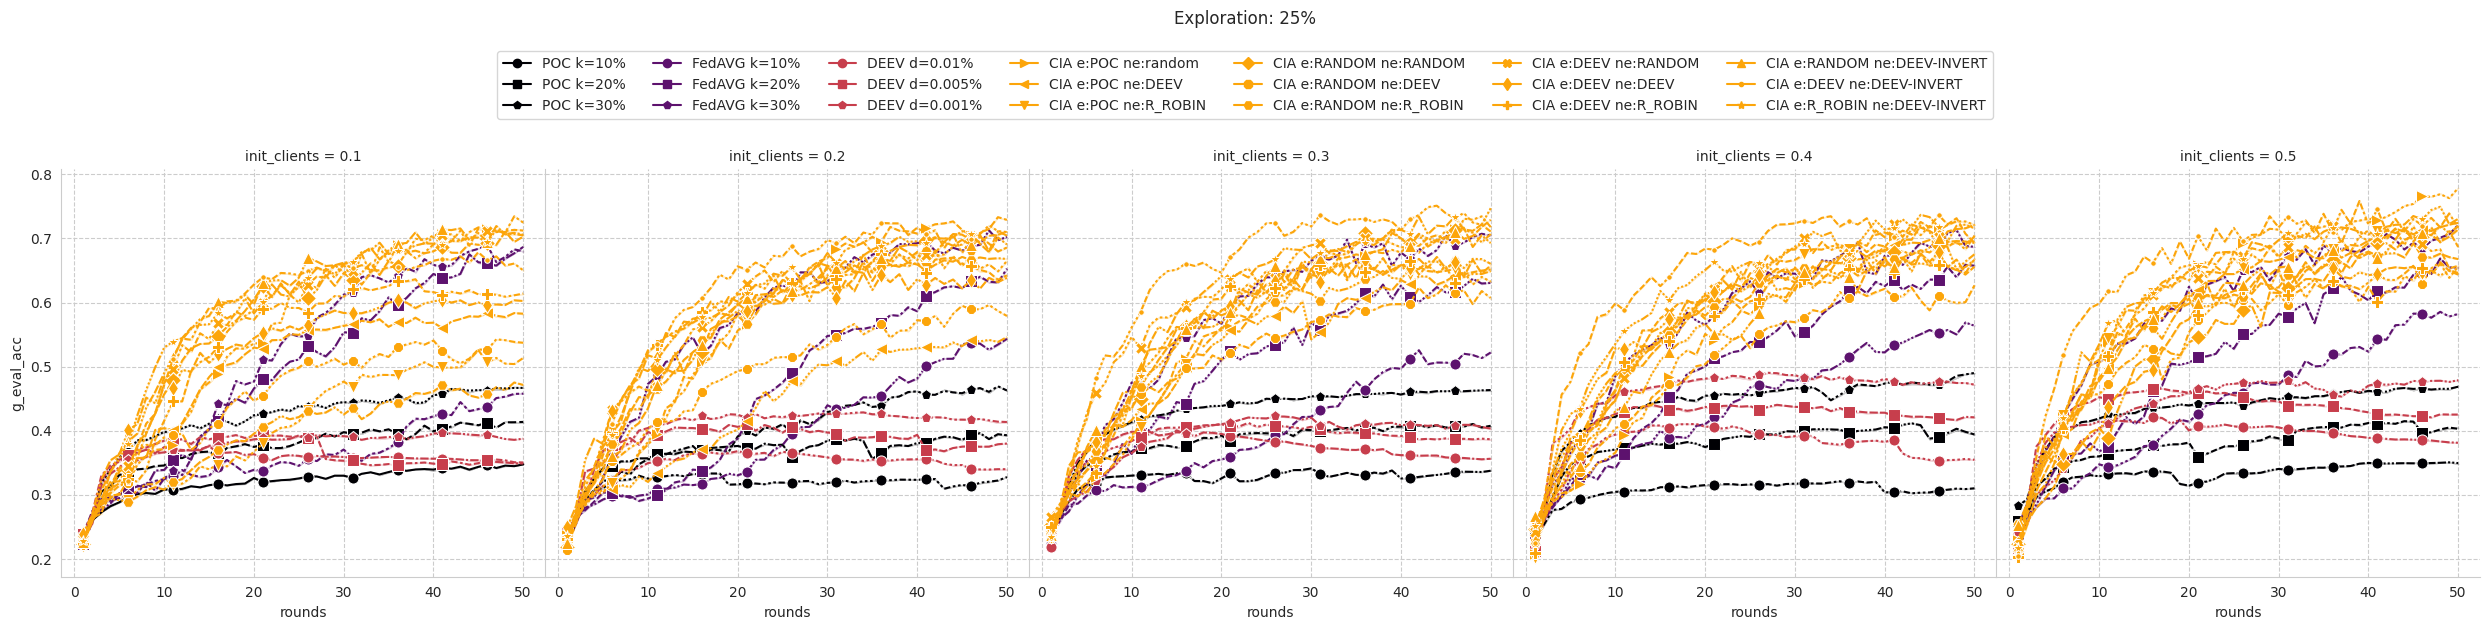

In [290]:
sns.set_style('whitegrid', {'grid.linestyle': '--'})
g = sns.relplot(
    x='rounds',
    y='g_eval_acc',
    data=data_25,
    col='init_clients',
    hue='config_test',
    style='config_test',
    markers=others_markers,
    markevery=5,
    markersize=8,
    palette=others_palette,
    errorbar=('ci', False),
    facet_kws={'sharey': True, 'legend_out': False},
    kind='line'
)
g._legend.remove()
legend_elements = []
for key, value in markers_base.items():
    if "POC k=" in key:
        color = colors['poc']
    elif 'AVG' in key:
        color = colors['avg']
    elif 'DEEV d=' in key:
        color = colors['deev']
    else:
        color = colors['cia']
    legend_elements.append(Line2D([0], [0], label=key, color=color, marker=value)),

plt.subplots_adjust(hspace=0, wspace=0.0)
g.fig.legend(handles=legend_elements, ncol=7, loc='center', bbox_to_anchor=(0.5, 1.1))
g.fig.suptitle("Exploration: 25%", y=1.25)
g.savefig('accuracy_0.25.png', dpi=500)

In [267]:
data_50 = pd.concat([o_data, data.loc[data['exploration'] == 0.5]])
data_50.head()

,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients,config_test
0,1,14,poc,random,dnn,0.20,30.174433,0.26,27.335854,0.474453,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
1,1,81,poc,random,dnn,0.32,42.123833,0.31,77.628120,0.758182,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
2,1,0,poc,random,dnn,0.19,14.421803,0.29,117.269112,0.804320,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
3,1,98,poc,random,dnn,0.25,78.871979,0.25,224.975388,0.833333,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
4,1,30,poc,random,dnn,0.25,34.100349,0.21,52.059048,0.512195,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10


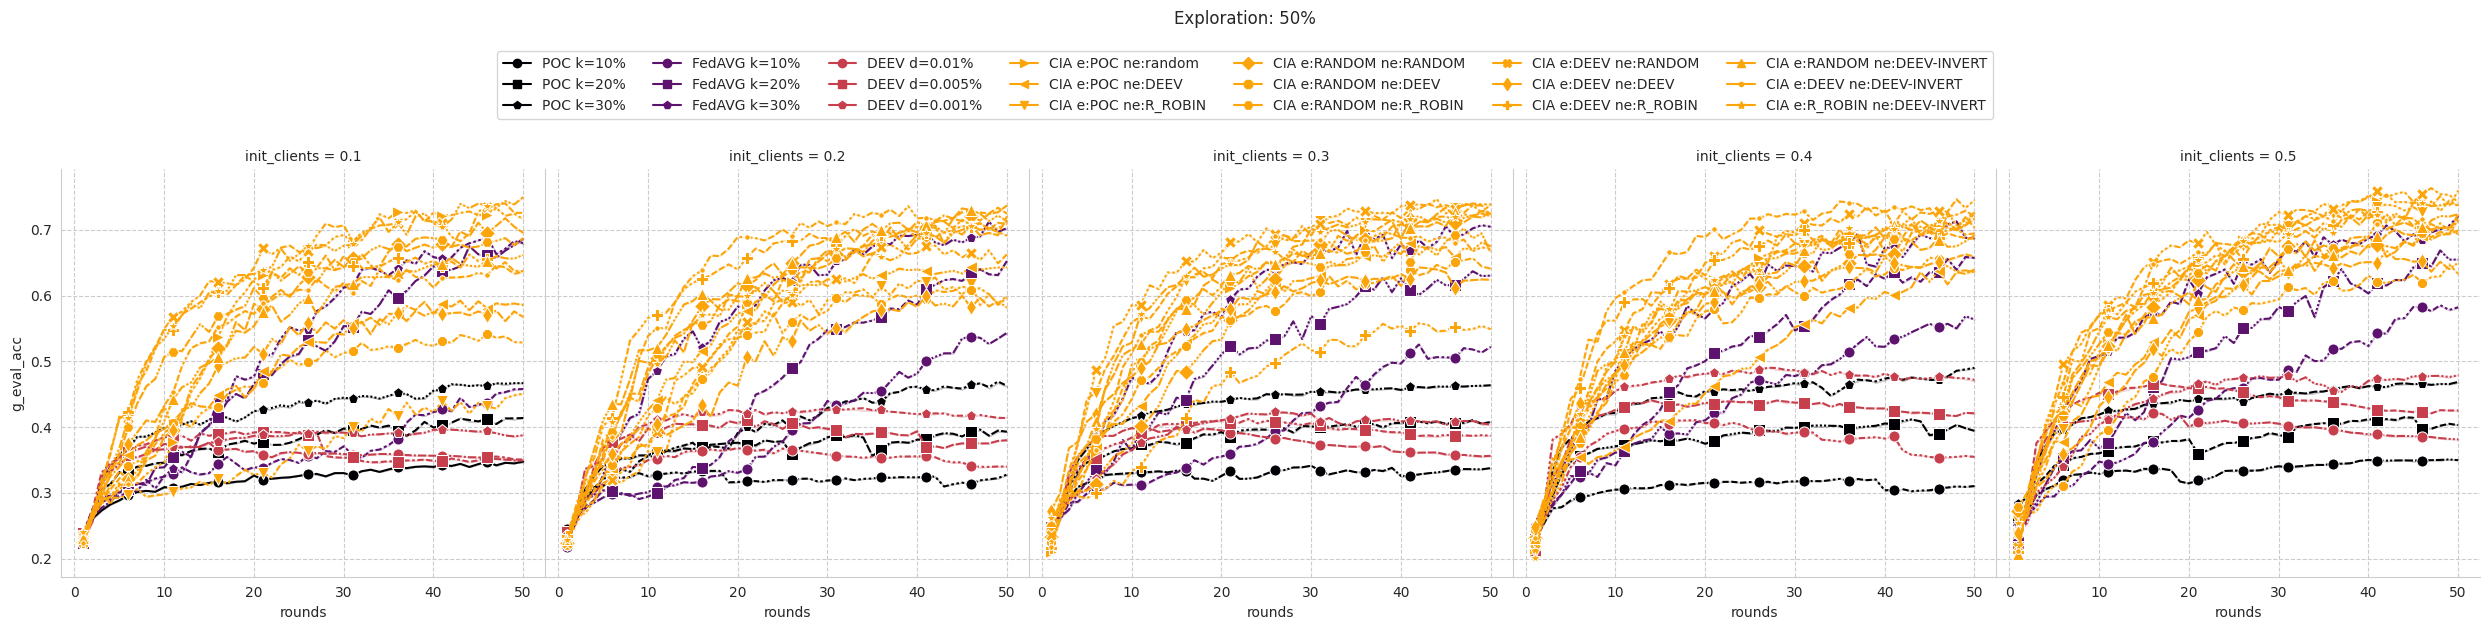

In [291]:
sns.set_style('whitegrid', {'grid.linestyle': '--'})
g = sns.relplot(
    x='rounds',
    y='g_eval_acc',
    data=data_50,
    col='init_clients',
    hue='config_test',
    style='config_test',
    markers=others_markers,
    markevery=5,
    markersize=8,
    palette=others_palette,
    errorbar=('ci', False),
    facet_kws={'sharey': True, 'legend_out': False},
    kind='line'
)
g._legend.remove()
legend_elements = []
for key, value in markers_base.items():
    if "POC k=" in key:
        color = colors['poc']
    elif 'AVG' in key:
        color = colors['avg']
    elif 'DEEV d=' in key:
        color = colors['deev']
    else:
        color = colors['cia']
    legend_elements.append(Line2D([0], [0], label=key, color=color, marker=value)),

plt.subplots_adjust(hspace=0, wspace=0.0)
g.fig.legend(handles=legend_elements, ncol=7, loc='center', bbox_to_anchor=(0.5, 1.1))
g.fig.suptitle("Exploration: 50%", y=1.25)
g.savefig('accuracy_0.50.png', dpi=500)

In [270]:
data_75 = pd.concat([o_data, data.loc[data['exploration'] == 0.75]])
data_75.head()

,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients,config_test
0,1,14,poc,random,dnn,0.20,30.174433,0.26,27.335854,0.474453,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
1,1,81,poc,random,dnn,0.32,42.123833,0.31,77.628120,0.758182,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
2,1,0,poc,random,dnn,0.19,14.421803,0.29,117.269112,0.804320,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
3,1,98,poc,random,dnn,0.25,78.871979,0.25,224.975388,0.833333,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
4,1,30,poc,random,dnn,0.25,34.100349,0.21,52.059048,0.512195,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10


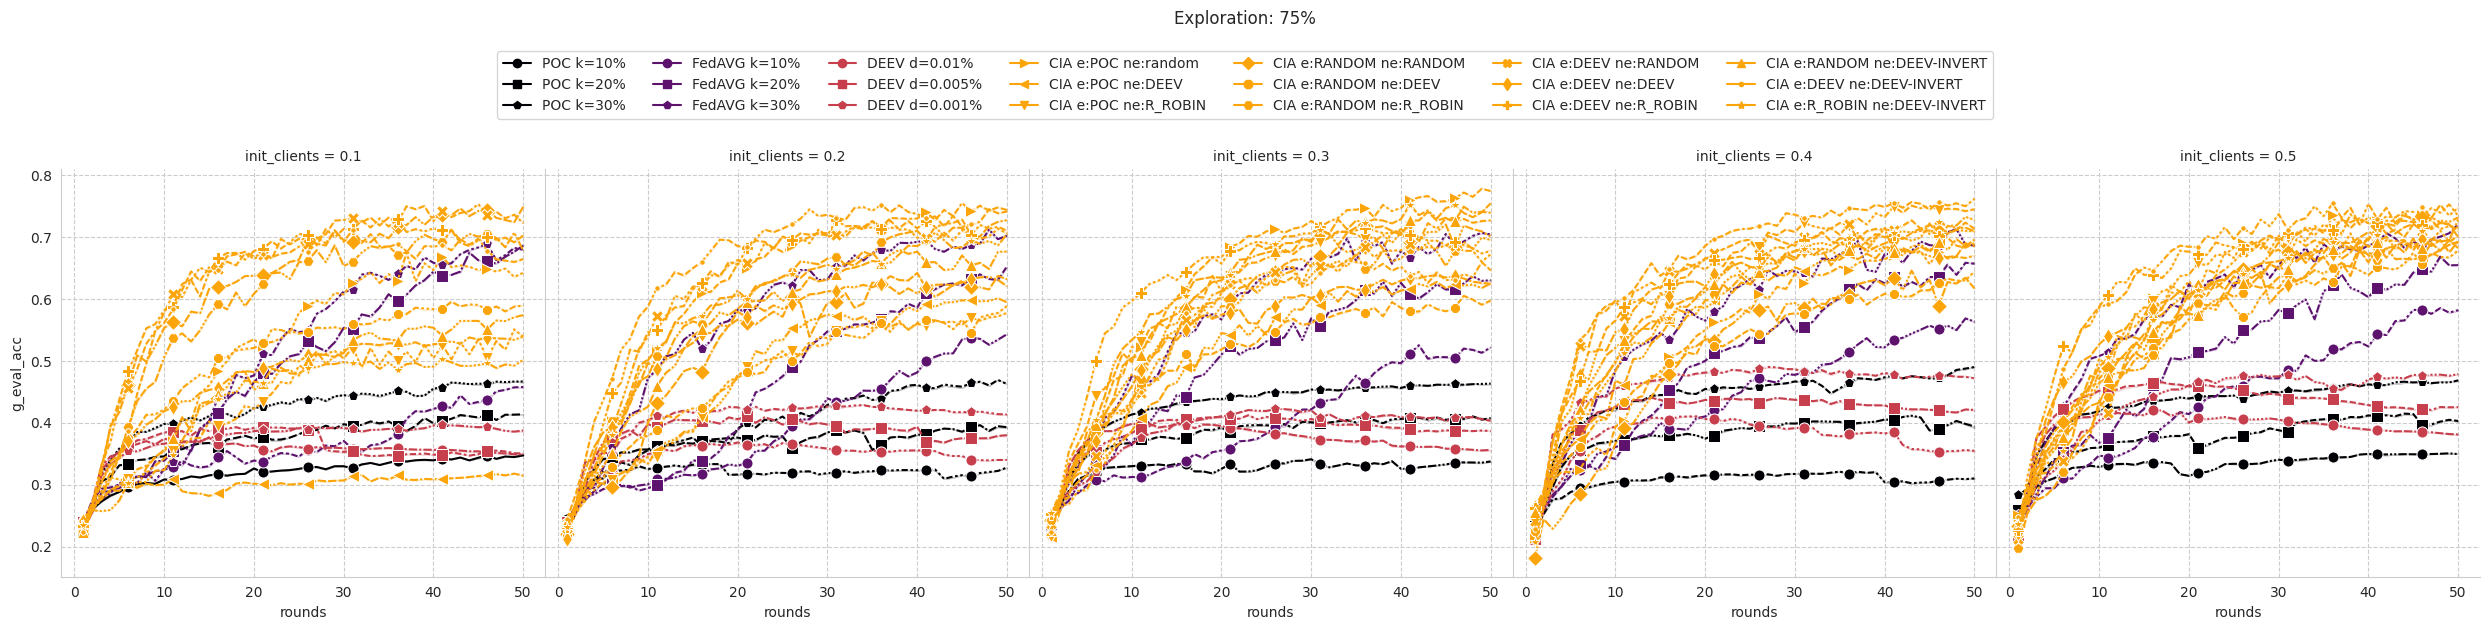

In [292]:
sns.set_style('whitegrid', {'grid.linestyle': '--'})
g = sns.relplot(
    x='rounds',
    y='g_eval_acc',
    data=data_75,
    col='init_clients',
    hue='config_test',
    style='config_test',
    markers=others_markers,
    markevery=5,
    markersize=8,
    palette=others_palette,
    errorbar=('ci', False),
    facet_kws={'sharey': True, 'legend_out': False},
    kind='line'
)
g._legend.remove()
legend_elements = []
for key, value in markers_base.items():
    if "POC k=" in key:
        color = colors['poc']
    elif 'AVG' in key:
        color = colors['avg']
    elif 'DEEV d=' in key:
        color = colors['deev']
    else:
        color = colors['cia']
    legend_elements.append(Line2D([0], [0], label=key, color=color, marker=value)),

plt.subplots_adjust(hspace=0, wspace=0.0)
g.fig.legend(handles=legend_elements, ncol=7, loc='center', bbox_to_anchor=(0.5, 1.1))
g.fig.suptitle("Exploration: 75%", y=1.25)
g.savefig('accuracy_0.75.png', dpi=500)

## Network waste

In [272]:
barplot_labels = [
    "POC k=10%","POC k=20%","POC k=30%",
    "FedAVG k=10%","FedAVG k=20%","FedAVG k=30%",
    "DEEV d=0.01%","DEEV d=0.005%","DEEV d=0.001%",
    "FedCIA POC random","FedCIA POC DEEV","FedCIA POC R_ROBIN",
    "FedCIA RANDOM random","FedCIA RANDOM DEEV","FedCIA RANDOM R_ROBIN",
    "FedCIA DEEV random","FedCIA DEEV DEEV","FedCIA DEEV R_ROBIN",
    "FedCIA DEEV-INVERT random","FedCIA DEEV-INVERT DEEV","FedCIA DEEV-INVERT R_ROBIN"
]
c = plt.cm.inferno(np.linspace(0,1,len(barplot_labels)))
barplot_colors = dict(zip(barplot_labels, c))

In [273]:
bar_labels = []
for label in all_labels:
    if 'ic:10' in label:
        bar_labels.append((label, 0.1))
    elif 'ic:20' in label:
        bar_labels.append((label, 0.2))
    elif 'ic:30' in label:
        bar_labels.append((label, 0.3))
    elif 'ic:40' in label:
        bar_labels.append((label, 0.4))
    elif 'ic:50' in label:
        bar_labels.append((label, 0.5))
i=220
bar_labels[i:i+10]

[('FedCIA DEEV-INVERT DEEV ic:50 expl:50', 0.5),
 ('FedCIA DEEV-INVERT R_ROBIN ic:50 expl:50', 0.5),
 ('FedCIA DEEV-INVERT random ic:50 expl:75', 0.5),
 ('FedCIA DEEV-INVERT DEEV ic:50 expl:75', 0.5),
 ('FedCIA DEEV-INVERT R_ROBIN ic:50 expl:75', 0.5)]

In [274]:
bar_colors = []
for label in bar_labels:
    if "POC 10" in label[0]:
        bar_colors.append(barplot_colors["POC k=10%"])
    if "POC 20" in label[0]:
        bar_colors.append(barplot_colors["POC k=20%"])
    if "POC 30" in label[0]:
        bar_colors.append(barplot_colors["POC k=30%"])
    if "AVG 10" in label[0]:
        bar_colors.append(barplot_colors["FedAVG k=10%"])
    if "AVG 20" in label[0]:
        bar_colors.append(barplot_colors["FedAVG k=20%"])
    if "AVG 30" in label[0]:
        bar_colors.append(barplot_colors["FedAVG k=30%"])
    if "DEEV 0.01" in label[0]:
        bar_colors.append(barplot_colors["DEEV d=0.01%"])
    if "DEEV 0.005" in label[0]:
        bar_colors.append(barplot_colors["DEEV d=0.005%"])
    if "DEEV 0.001" in label[0]:
        bar_colors.append(barplot_colors["DEEV d=0.001%"])
    if "FedCIA POC random" in label[0]:
        bar_colors.append(barplot_colors["FedCIA POC random"])
    if "FedCIA POC DEEV" in label[0]:
        bar_colors.append(barplot_colors["FedCIA POC DEEV"])
    if "FedCIA POC R_ROBIN" in label[0]:
        bar_colors.append(barplot_colors["FedCIA POC R_ROBIN"])
    if "FedCIA RANDOM random" in label[0]:
        bar_colors.append(barplot_colors["FedCIA RANDOM random"])
    if "FedCIA RANDOM DEEV" in label[0]:
        bar_colors.append(barplot_colors["FedCIA RANDOM DEEV"])
    if "FedCIA RANDOM R_ROBIN" in label[0]:
        bar_colors.append(barplot_colors["FedCIA RANDOM R_ROBIN"])
    if "FedCIA DEEV random" in label[0]:
        bar_colors.append(barplot_colors["FedCIA DEEV random"])
    if "FedCIA DEEV DEEV" in label[0]:
        bar_colors.append(barplot_colors["FedCIA DEEV DEEV"])
    if "FedCIA DEEV R_ROBIN" in label[0]:
        bar_colors.append(barplot_colors["FedCIA DEEV R_ROBIN"])
    if "FedCIA DEEV-INVERT random" in label[0]:
        bar_colors.append(barplot_colors["FedCIA DEEV-INVERT random"])
    if "FedCIA DEEV-INVERT DEEV" in label[0]:
        bar_colors.append(barplot_colors["FedCIA DEEV-INVERT DEEV"])
    if "FedCIA DEEV-INVERT R_ROBIN" == label[0]:
        print("FedCIA DEEV-INVERT R_ROBIN" in label[0])
    if "FedCIA DEEV-INVERT R_ROBIN" in label[0]:
        bar_colors.append(barplot_colors["FedCIA DEEV-INVERT R_ROBIN"])
i=220
print(len(labels), len(bar_colors))
bar_colors[i:i+10]

225 225


[array([0.946403, 0.937159, 0.458592, 1.      ]),
 array([0.988362, 0.998364, 0.644924, 1.      ]),
 array([0.964394, 0.843848, 0.273391, 1.      ]),
 array([0.946403, 0.937159, 0.458592, 1.      ]),
 array([0.988362, 0.998364, 0.644924, 1.      ])]

In [275]:
barplot_palette = dict(zip(labels, bar_colors))
# barplot_palette[('FedCIA DEEV-INVERT R_ROBIN ic:50 expl:50', 0.5)]

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



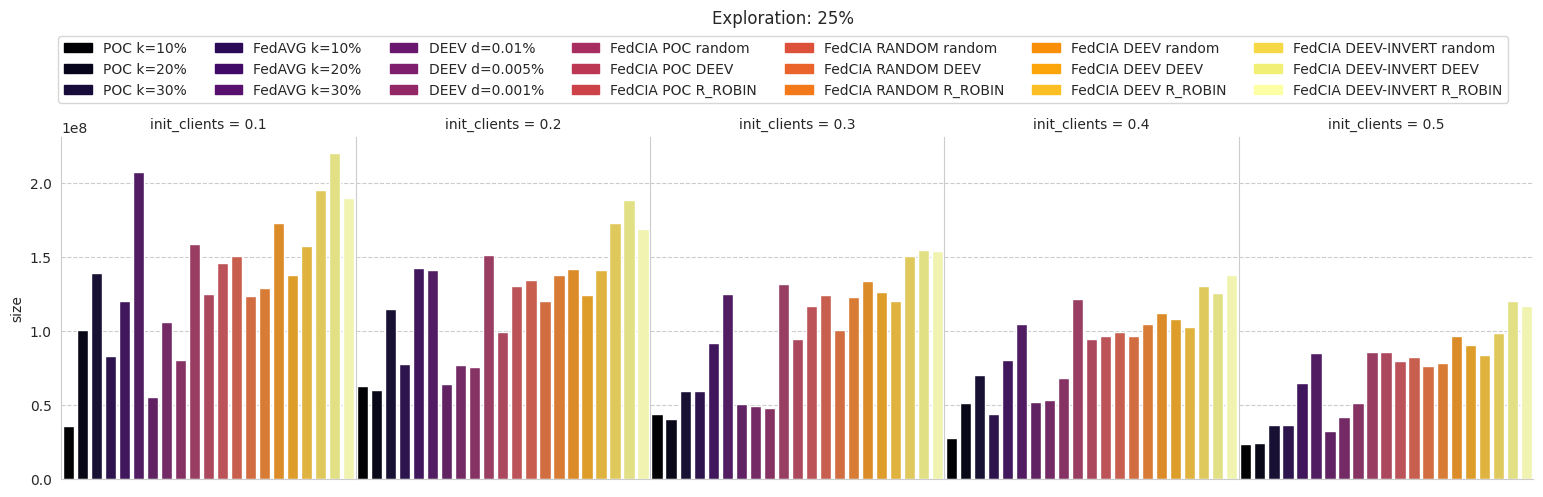

In [287]:
g = sns.catplot(
    data=data_25.loc[
        (data_25['is_selected'] == True) &
        (data_25['rounds'] > 1) &
        (data_25['old_dynamic_engagement'] == False)
    ],
    y='size',
    x='config_test',
    hue=data_25[['config_test', 'init_clients']].apply(tuple, axis=1),
    col='init_clients',
    kind='bar',
    estimator=sum,
    palette=barplot_palette,
    sharey=True,
    sharex=False,
)
# g.add_legend()
g._legend.remove()
legend_elements = [
    Patch(label="POC k=10%", color=barplot_colors["POC k=10%"]),
    Patch(label="POC k=20%", color=barplot_colors["POC k=20%"]),
    Patch(label="POC k=30%", color=barplot_colors["POC k=30%"]),
    Patch(label="FedAVG k=10%", color=barplot_colors["FedAVG k=10%"]),
    Patch(label="FedAVG k=20%", color=barplot_colors["FedAVG k=20%"]),
    Patch(label="FedAVG k=30%", color=barplot_colors["FedAVG k=30%"]),
    Patch(label="DEEV d=0.01%", color=barplot_colors["DEEV d=0.01%"]),
    Patch(label="DEEV d=0.005%", color=barplot_colors["DEEV d=0.005%"]),
    Patch(label="DEEV d=0.001%", color=barplot_colors["DEEV d=0.001%"]),
    Patch(label="FedCIA POC random", color=barplot_colors["FedCIA POC random"]),
    Patch(label="FedCIA POC DEEV", color=barplot_colors["FedCIA POC DEEV"]),
    Patch(label="FedCIA POC R_ROBIN", color=barplot_colors["FedCIA POC R_ROBIN"]),
    Patch(label="FedCIA RANDOM random", color=barplot_colors["FedCIA RANDOM random"]),
    Patch(label="FedCIA RANDOM DEEV", color=barplot_colors["FedCIA RANDOM DEEV"]),
    Patch(label="FedCIA RANDOM R_ROBIN", color=barplot_colors["FedCIA RANDOM R_ROBIN"]),
    Patch(label="FedCIA DEEV random", color=barplot_colors["FedCIA DEEV random"]),
    Patch(label="FedCIA DEEV DEEV", color=barplot_colors["FedCIA DEEV DEEV"]),
    Patch(label="FedCIA DEEV R_ROBIN", color=barplot_colors["FedCIA DEEV R_ROBIN"]),
    Patch(label="FedCIA DEEV-INVERT random", color=barplot_colors["FedCIA DEEV-INVERT random"]),
    Patch(label="FedCIA DEEV-INVERT DEEV", color=barplot_colors["FedCIA DEEV-INVERT DEEV"]),
    Patch(label="FedCIA DEEV-INVERT R_ROBIN", color=barplot_colors["FedCIA DEEV-INVERT R_ROBIN"]),
]
g.set_axis_labels("", "size")
g.fig.set_size_inches(15,4)
g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
for ax in g.axes.flatten():
    ax.set_xticklabels([])
g.fig.legend(handles=legend_elements, ncol=7, loc='center', bbox_to_anchor=(0.5,1.1))

g.fig.suptitle("Exploration: 25%", y=1.25)
g.savefig('waste_0.25.png', dpi=500)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



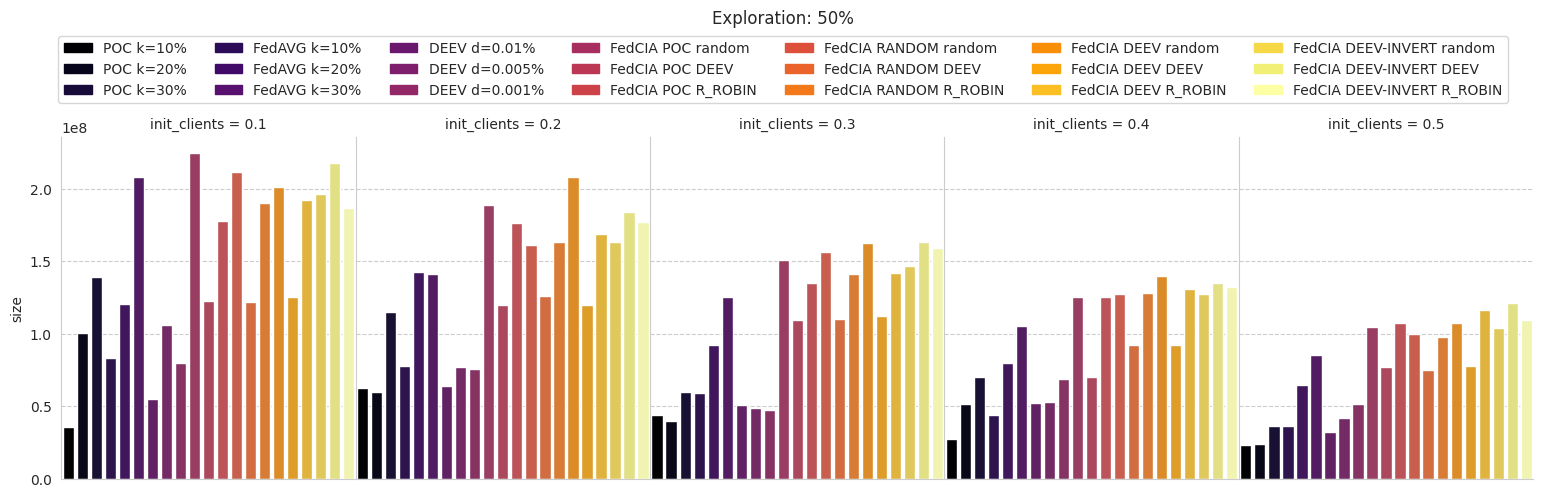

In [288]:
g = sns.catplot(
    data=data_50.loc[
        (data_50['is_selected'] == True) &
        (data_50['rounds'] > 1) &
        (data_50['old_dynamic_engagement'] == False)
    ],
    y='size',
    x='config_test',
    hue=data_50[['config_test', 'init_clients']].apply(tuple, axis=1),
    col='init_clients',
    kind='bar',
    estimator=sum,
    palette=barplot_palette,
    sharey=True,
    sharex=False,
)
# g.add_legend()
g._legend.remove()
legend_elements = [
    Patch(label="POC k=10%", color=barplot_colors["POC k=10%"]),
    Patch(label="POC k=20%", color=barplot_colors["POC k=20%"]),
    Patch(label="POC k=30%", color=barplot_colors["POC k=30%"]),
    Patch(label="FedAVG k=10%", color=barplot_colors["FedAVG k=10%"]),
    Patch(label="FedAVG k=20%", color=barplot_colors["FedAVG k=20%"]),
    Patch(label="FedAVG k=30%", color=barplot_colors["FedAVG k=30%"]),
    Patch(label="DEEV d=0.01%", color=barplot_colors["DEEV d=0.01%"]),
    Patch(label="DEEV d=0.005%", color=barplot_colors["DEEV d=0.005%"]),
    Patch(label="DEEV d=0.001%", color=barplot_colors["DEEV d=0.001%"]),
    Patch(label="FedCIA POC random", color=barplot_colors["FedCIA POC random"]),
    Patch(label="FedCIA POC DEEV", color=barplot_colors["FedCIA POC DEEV"]),
    Patch(label="FedCIA POC R_ROBIN", color=barplot_colors["FedCIA POC R_ROBIN"]),
    Patch(label="FedCIA RANDOM random", color=barplot_colors["FedCIA RANDOM random"]),
    Patch(label="FedCIA RANDOM DEEV", color=barplot_colors["FedCIA RANDOM DEEV"]),
    Patch(label="FedCIA RANDOM R_ROBIN", color=barplot_colors["FedCIA RANDOM R_ROBIN"]),
    Patch(label="FedCIA DEEV random", color=barplot_colors["FedCIA DEEV random"]),
    Patch(label="FedCIA DEEV DEEV", color=barplot_colors["FedCIA DEEV DEEV"]),
    Patch(label="FedCIA DEEV R_ROBIN", color=barplot_colors["FedCIA DEEV R_ROBIN"]),
    Patch(label="FedCIA DEEV-INVERT random", color=barplot_colors["FedCIA DEEV-INVERT random"]),
    Patch(label="FedCIA DEEV-INVERT DEEV", color=barplot_colors["FedCIA DEEV-INVERT DEEV"]),
    Patch(label="FedCIA DEEV-INVERT R_ROBIN", color=barplot_colors["FedCIA DEEV-INVERT R_ROBIN"]),
]
g.set_axis_labels("", "size")
g.fig.set_size_inches(15,4)
g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
for ax in g.axes.flatten():
    ax.set_xticklabels([])
g.fig.legend(handles=legend_elements, ncol=7, loc='center', bbox_to_anchor=(0.5,1.1))

g.fig.suptitle("Exploration: 50%", y=1.25)
g.savefig('waste_0.50.png', dpi=500)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



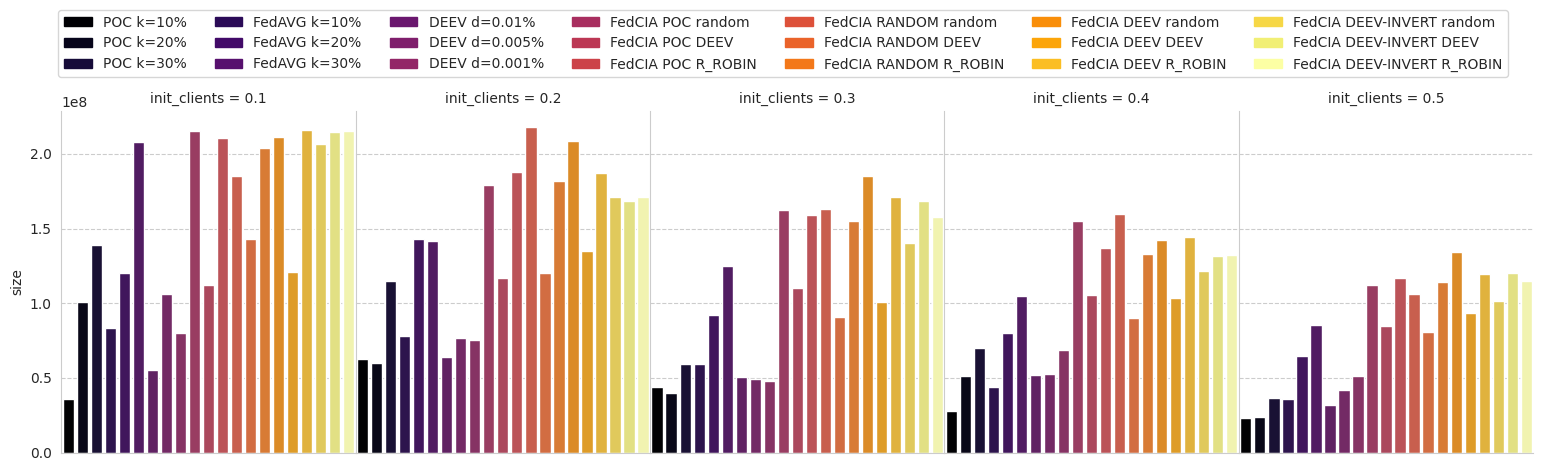

In [301]:
g = sns.catplot(
    data=data_75.loc[
        (data_75['is_selected'] == True) &
        (data_75['rounds'] > 1) &
        (data_75['old_dynamic_engagement'] == False)
    ],
    y='size',
    x='config_test',
    hue=data_75[['config_test', 'init_clients']].apply(tuple, axis=1),
    col='init_clients',
    kind='bar',
    estimator=sum,
    palette=barplot_palette,
    sharey=True,
    sharex=False,
)
# g.add_legend()
g._legend.remove()
legend_elements = [
    Patch(label="POC k=10%", color=barplot_colors["POC k=10%"]),
    Patch(label="POC k=20%", color=barplot_colors["POC k=20%"]),
    Patch(label="POC k=30%", color=barplot_colors["POC k=30%"]),
    Patch(label="FedAVG k=10%", color=barplot_colors["FedAVG k=10%"]),
    Patch(label="FedAVG k=20%", color=barplot_colors["FedAVG k=20%"]),
    Patch(label="FedAVG k=30%", color=barplot_colors["FedAVG k=30%"]),
    Patch(label="DEEV d=0.01%", color=barplot_colors["DEEV d=0.01%"]),
    Patch(label="DEEV d=0.005%", color=barplot_colors["DEEV d=0.005%"]),
    Patch(label="DEEV d=0.001%", color=barplot_colors["DEEV d=0.001%"]),
    Patch(label="FedCIA POC random", color=barplot_colors["FedCIA POC random"]),
    Patch(label="FedCIA POC DEEV", color=barplot_colors["FedCIA POC DEEV"]),
    Patch(label="FedCIA POC R_ROBIN", color=barplot_colors["FedCIA POC R_ROBIN"]),
    Patch(label="FedCIA RANDOM random", color=barplot_colors["FedCIA RANDOM random"]),
    Patch(label="FedCIA RANDOM DEEV", color=barplot_colors["FedCIA RANDOM DEEV"]),
    Patch(label="FedCIA RANDOM R_ROBIN", color=barplot_colors["FedCIA RANDOM R_ROBIN"]),
    Patch(label="FedCIA DEEV random", color=barplot_colors["FedCIA DEEV random"]),
    Patch(label="FedCIA DEEV DEEV", color=barplot_colors["FedCIA DEEV DEEV"]),
    Patch(label="FedCIA DEEV R_ROBIN", color=barplot_colors["FedCIA DEEV R_ROBIN"]),
    Patch(label="FedCIA DEEV-INVERT random", color=barplot_colors["FedCIA DEEV-INVERT random"]),
    Patch(label="FedCIA DEEV-INVERT DEEV", color=barplot_colors["FedCIA DEEV-INVERT DEEV"]),
    Patch(label="FedCIA DEEV-INVERT R_ROBIN", color=barplot_colors["FedCIA DEEV-INVERT R_ROBIN"]),
]
g.set_axis_labels("", "size")
g.fig.set_size_inches(15,4)
g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
for ax in g.axes.flatten():
    ax.set_xticklabels([])
g.fig.legend(handles=legend_elements, ncol=7, loc='center', bbox_to_anchor=(0.5,1.1))

# g.fig.suptitle("Exploration: 75%", y=1.25)
# g.savefig('waste_0.75.png', dpi=500)

## BOXPLOT

In [295]:
o_data_s = raw_server_data.loc[(raw_server_data['config_test'].isin(others))]

In [296]:
boxplot_25 = pd.concat([raw_server_data.loc[raw_server_data['exploration'] == 0.25], o_data_s])
boxplot_50 = pd.concat([raw_server_data.loc[raw_server_data['exploration'] == 0.50], o_data_s])
boxplot_75 = pd.concat([raw_server_data.loc[raw_server_data['exploration'] == 0.75], o_data_s])

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



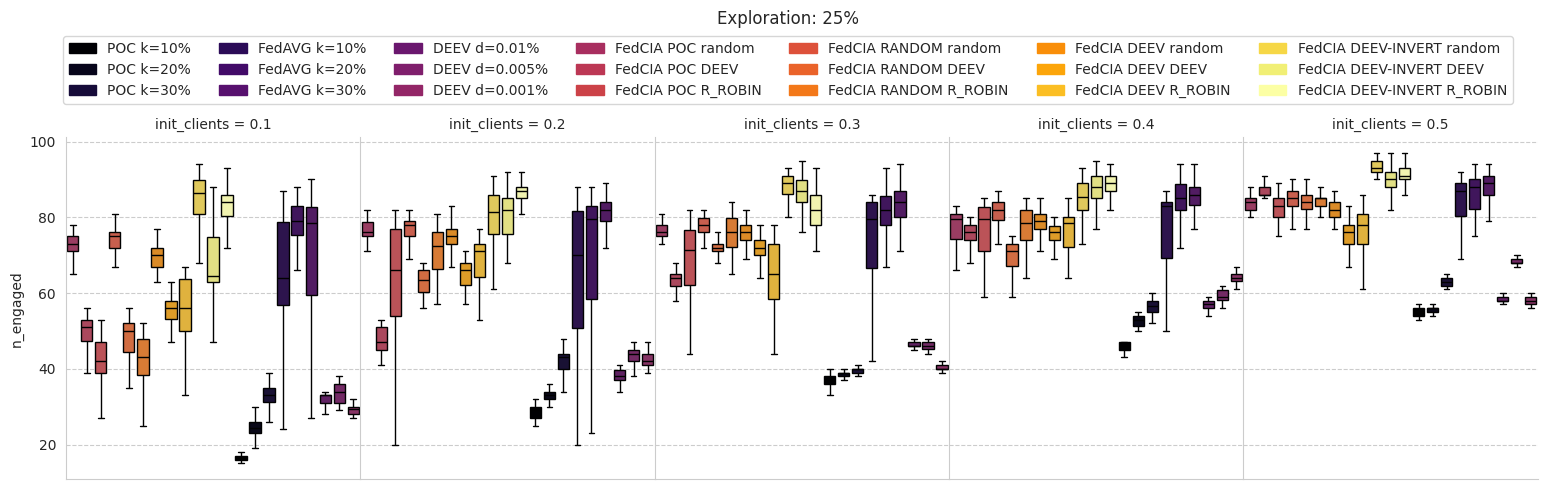

In [297]:
g = sns.catplot(
    data=boxplot_25,
    y='n_engaged',
    x='config_test',
    hue=boxplot_25[['config_test', 'init_clients']].apply(tuple, axis=1),
    col='init_clients',
    kind='box',
    palette=barplot_palette,
    sharey=True,
    sharex=False,
    showfliers = False,
)
# g.add_legend()
g._legend.remove()
legend_elements = [
    Patch(label="POC k=10%", color=barplot_colors["POC k=10%"]),
    Patch(label="POC k=20%", color=barplot_colors["POC k=20%"]),
    Patch(label="POC k=30%", color=barplot_colors["POC k=30%"]),
    Patch(label="FedAVG k=10%", color=barplot_colors["FedAVG k=10%"]),
    Patch(label="FedAVG k=20%", color=barplot_colors["FedAVG k=20%"]),
    Patch(label="FedAVG k=30%", color=barplot_colors["FedAVG k=30%"]),
    Patch(label="DEEV d=0.01%", color=barplot_colors["DEEV d=0.01%"]),
    Patch(label="DEEV d=0.005%", color=barplot_colors["DEEV d=0.005%"]),
    Patch(label="DEEV d=0.001%", color=barplot_colors["DEEV d=0.001%"]),
    Patch(label="FedCIA POC random", color=barplot_colors["FedCIA POC random"]),
    Patch(label="FedCIA POC DEEV", color=barplot_colors["FedCIA POC DEEV"]),
    Patch(label="FedCIA POC R_ROBIN", color=barplot_colors["FedCIA POC R_ROBIN"]),
    Patch(label="FedCIA RANDOM random", color=barplot_colors["FedCIA RANDOM random"]),
    Patch(label="FedCIA RANDOM DEEV", color=barplot_colors["FedCIA RANDOM DEEV"]),
    Patch(label="FedCIA RANDOM R_ROBIN", color=barplot_colors["FedCIA RANDOM R_ROBIN"]),
    Patch(label="FedCIA DEEV random", color=barplot_colors["FedCIA DEEV random"]),
    Patch(label="FedCIA DEEV DEEV", color=barplot_colors["FedCIA DEEV DEEV"]),
    Patch(label="FedCIA DEEV R_ROBIN", color=barplot_colors["FedCIA DEEV R_ROBIN"]),
    Patch(label="FedCIA DEEV-INVERT random", color=barplot_colors["FedCIA DEEV-INVERT random"]),
    Patch(label="FedCIA DEEV-INVERT DEEV", color=barplot_colors["FedCIA DEEV-INVERT DEEV"]),
    Patch(label="FedCIA DEEV-INVERT R_ROBIN", color=barplot_colors["FedCIA DEEV-INVERT R_ROBIN"]),
]
g.fig.set_size_inches(15,4)
g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
for ax in g.axes.flatten():
    ax.set_xticklabels([])
g.fig.legend(handles=legend_elements, ncol=7, loc='center', bbox_to_anchor=(0.5,1.1))
g.set_axis_labels("", "n_engaged")
g.fig.suptitle("Exploration: 25%", y=1.25)
g.savefig("engaged_clients_0.25.png")

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



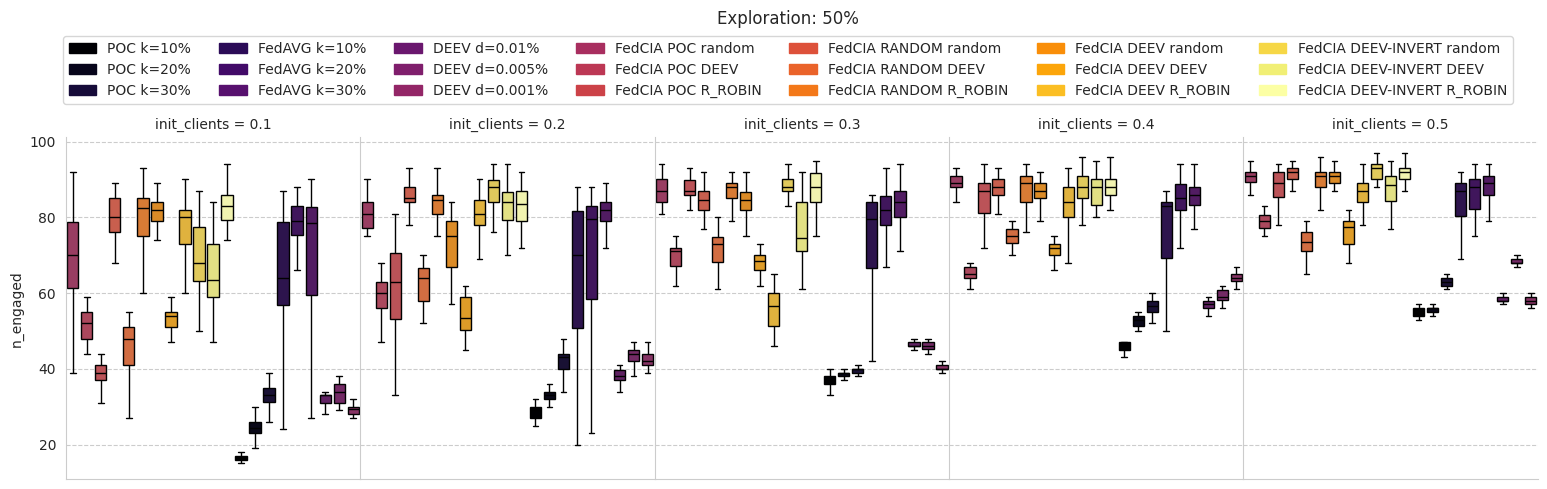

In [298]:
g = sns.catplot(
    data=boxplot_50,
    y='n_engaged',
    x='config_test',
    hue=boxplot_50[['config_test', 'init_clients']].apply(tuple, axis=1),
    col='init_clients',
    kind='box',
    palette=barplot_palette,
    sharey=True,
    sharex=False,
    showfliers = False,
)
# g.add_legend()
g._legend.remove()
legend_elements = [
    Patch(label="POC k=10%", color=barplot_colors["POC k=10%"]),
    Patch(label="POC k=20%", color=barplot_colors["POC k=20%"]),
    Patch(label="POC k=30%", color=barplot_colors["POC k=30%"]),
    Patch(label="FedAVG k=10%", color=barplot_colors["FedAVG k=10%"]),
    Patch(label="FedAVG k=20%", color=barplot_colors["FedAVG k=20%"]),
    Patch(label="FedAVG k=30%", color=barplot_colors["FedAVG k=30%"]),
    Patch(label="DEEV d=0.01%", color=barplot_colors["DEEV d=0.01%"]),
    Patch(label="DEEV d=0.005%", color=barplot_colors["DEEV d=0.005%"]),
    Patch(label="DEEV d=0.001%", color=barplot_colors["DEEV d=0.001%"]),
    Patch(label="FedCIA POC random", color=barplot_colors["FedCIA POC random"]),
    Patch(label="FedCIA POC DEEV", color=barplot_colors["FedCIA POC DEEV"]),
    Patch(label="FedCIA POC R_ROBIN", color=barplot_colors["FedCIA POC R_ROBIN"]),
    Patch(label="FedCIA RANDOM random", color=barplot_colors["FedCIA RANDOM random"]),
    Patch(label="FedCIA RANDOM DEEV", color=barplot_colors["FedCIA RANDOM DEEV"]),
    Patch(label="FedCIA RANDOM R_ROBIN", color=barplot_colors["FedCIA RANDOM R_ROBIN"]),
    Patch(label="FedCIA DEEV random", color=barplot_colors["FedCIA DEEV random"]),
    Patch(label="FedCIA DEEV DEEV", color=barplot_colors["FedCIA DEEV DEEV"]),
    Patch(label="FedCIA DEEV R_ROBIN", color=barplot_colors["FedCIA DEEV R_ROBIN"]),
    Patch(label="FedCIA DEEV-INVERT random", color=barplot_colors["FedCIA DEEV-INVERT random"]),
    Patch(label="FedCIA DEEV-INVERT DEEV", color=barplot_colors["FedCIA DEEV-INVERT DEEV"]),
    Patch(label="FedCIA DEEV-INVERT R_ROBIN", color=barplot_colors["FedCIA DEEV-INVERT R_ROBIN"]),
]

g.fig.set_size_inches(15,4)
g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
for ax in g.axes.flatten():
    ax.set_xticklabels([])
g.fig.legend(handles=legend_elements, ncol=7, loc='center', bbox_to_anchor=(0.5,1.1))
g.set_axis_labels("", "n_engaged")
g.fig.suptitle("Exploration: 50%", y=1.25)
g.savefig("engaged_clients_0.50.png")

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



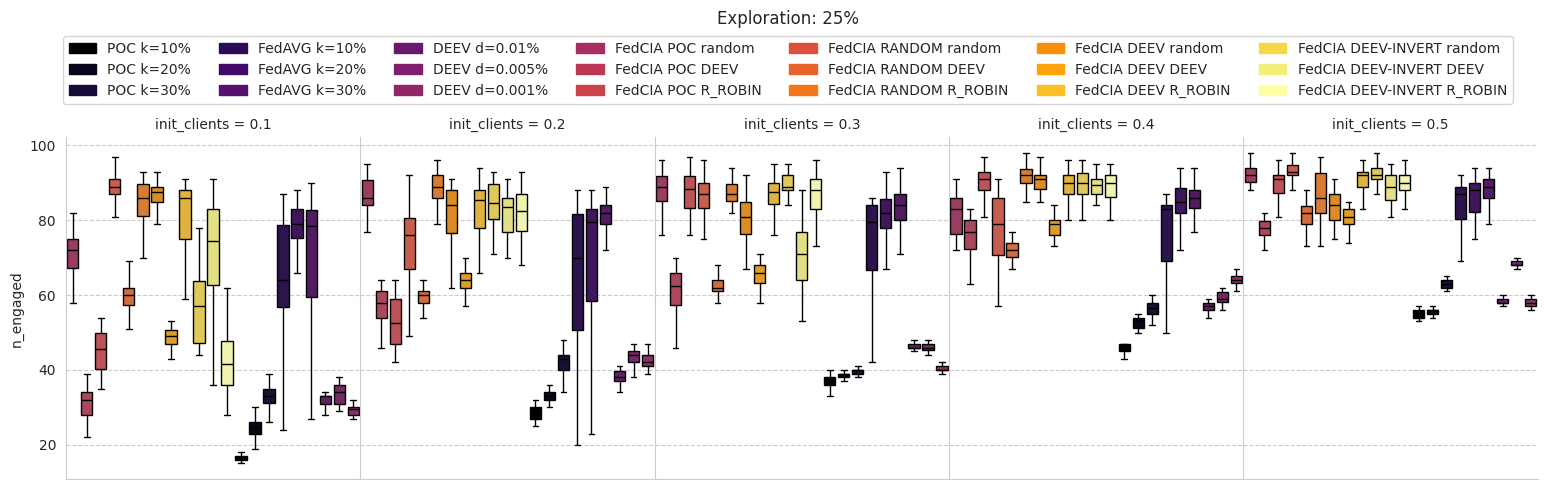

In [299]:
g = sns.catplot(
    data=boxplot_75,
    y='n_engaged',
    x='config_test',
    hue=boxplot_75[['config_test', 'init_clients']].apply(tuple, axis=1),
    col='init_clients',
    kind='box',
    palette=barplot_palette,
    sharey=True,
    sharex=False,
    showfliers = False,
)
# g.add_legend()
g._legend.remove()
legend_elements = [
    Patch(label="POC k=10%", color=barplot_colors["POC k=10%"]),
    Patch(label="POC k=20%", color=barplot_colors["POC k=20%"]),
    Patch(label="POC k=30%", color=barplot_colors["POC k=30%"]),
    Patch(label="FedAVG k=10%", color=barplot_colors["FedAVG k=10%"]),
    Patch(label="FedAVG k=20%", color=barplot_colors["FedAVG k=20%"]),
    Patch(label="FedAVG k=30%", color=barplot_colors["FedAVG k=30%"]),
    Patch(label="DEEV d=0.01%", color=barplot_colors["DEEV d=0.01%"]),
    Patch(label="DEEV d=0.005%", color=barplot_colors["DEEV d=0.005%"]),
    Patch(label="DEEV d=0.001%", color=barplot_colors["DEEV d=0.001%"]),
    Patch(label="FedCIA POC random", color=barplot_colors["FedCIA POC random"]),
    Patch(label="FedCIA POC DEEV", color=barplot_colors["FedCIA POC DEEV"]),
    Patch(label="FedCIA POC R_ROBIN", color=barplot_colors["FedCIA POC R_ROBIN"]),
    Patch(label="FedCIA RANDOM random", color=barplot_colors["FedCIA RANDOM random"]),
    Patch(label="FedCIA RANDOM DEEV", color=barplot_colors["FedCIA RANDOM DEEV"]),
    Patch(label="FedCIA RANDOM R_ROBIN", color=barplot_colors["FedCIA RANDOM R_ROBIN"]),
    Patch(label="FedCIA DEEV random", color=barplot_colors["FedCIA DEEV random"]),
    Patch(label="FedCIA DEEV DEEV", color=barplot_colors["FedCIA DEEV DEEV"]),
    Patch(label="FedCIA DEEV R_ROBIN", color=barplot_colors["FedCIA DEEV R_ROBIN"]),
    Patch(label="FedCIA DEEV-INVERT random", color=barplot_colors["FedCIA DEEV-INVERT random"]),
    Patch(label="FedCIA DEEV-INVERT DEEV", color=barplot_colors["FedCIA DEEV-INVERT DEEV"]),
    Patch(label="FedCIA DEEV-INVERT R_ROBIN", color=barplot_colors["FedCIA DEEV-INVERT R_ROBIN"]),
]
g.fig.set_size_inches(15,4)
g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
for ax in g.axes.flatten():
    ax.set_xticklabels([])
g.fig.legend(handles=legend_elements, ncol=7, loc='center', bbox_to_anchor=(0.5,1.1))
g.set_axis_labels("", "n_engaged")
g.fig.suptitle("Exploration: 25%", y=1.25)
g.savefig("engaged_clients_0.75.png")